In [2]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [3]:
%matplotlib inline

In [5]:
# this weather data from noaa nation center for environment information 
import urllib2 

for python3 
import urllib.request
urllib.request.urlretrieve()

In [10]:
#req = urllib2.Request('ftp://example.com/')

urllib2.Request('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

<urllib2.Request instance at 0x1097701b8>

In [7]:
# explore the data, take a look of the first 10 rows
open('stations.txt', 'r').readlines()[:10]
# station code of each station 

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [8]:
# write a function to extract the rows only "GSN" in it
stations = {}
for line in open('stations.txt', 'r'):
    if "GSN" in line:
        #just select the line with "GSN"
        fields = line.split()
        # then we use the first element as the key of the dictionary, 
        # the fifth and all the following items as the name of the station
        stations[fields[0]] = ' '.join(fields[4:])

In [9]:
len(stations)

994

In [19]:
# define a function to find the station with the station name
def findstation(s):
    found = {code: name for code, name in stations.items() if s in name}
    print found

In [20]:
findstation('LIHUE')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}


In [21]:
findstation('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


In [22]:
findstation('MINNEAPOLIS')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [23]:
findstation('IRKUTSK')

{'RSM00030710': 'IRKUTSK GSN 30710'}


In [68]:
# our analysis will focus on these 4 stations
datastations = ['USW00022536', 'USW00023188', 'USW00014922', 'RSM00030710']

In [10]:
open('USW00022536.dly', 'r').readlines()[:10]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [26]:
# fixed length text format
open('readme.txt', 'r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

Parsing a fixed-field text file using np.genfromtxt

Using ranges of Numpy datetime objects

In [13]:
def parsefile(filename):
    return np.genfromtxt(filename, # file name
                        delimiter = dly_delimiter, # size of all the files
                        usecols = dly_usecols, # which columns wish to keep
                        dtype = dly_dtype, # data type of the fields
                        names = dly_names)

In [14]:
dly_delimiter = [11, 4, 2, 4] + [5, 1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1, 32)]
dly_dtype = [np.int32, np.int32, (np.str_,4)] + [np.int32]*31
dly_names = ['year', 'month', 'obs'] + [str(day) for day in range(1, 31+1)]

In [15]:
lihue = parsefile('USW00022536.dly')

In [16]:
lihue

array([ (1950, 2, 'TMAX', 256, 256, 256, 267, 217, 228, 256, 272, 256, 256, 256, 244, 256, 256, 244, 244, 250, 256, 239, 250, 256, 256, 267, 261, 267, 267, 261, 261, -9999, -9999, -9999),
       (1950, 2, 'TMIN', 178, 156, 161, 167, 167, 167, 189, 211, 206, 217, 217, 211, 200, 200, 206, 183, 206, 206, 206, 194, 206, 200, 206, 200, 211, 183, 172, 200, -9999, -9999, -9999),
       (1950, 2, 'PRCP', 0, 0, 0, 0, 737, 406, 36, 38, 0, 0, 0, 0, 18, 5, 10, 18, 15, 5, 0, 0, 23, 10, 3, 48, 0, 0, 0, 5, -9999, -9999, -9999),
       ...,
       (2015, 9, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, -9999, 1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2015, 9, 'WT08', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, -9999, -9999, -9999, 1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, 1, -9999, -9999, -9999, -9999, -9999, -9999),
       

In [17]:
# each date should have a seperate row,
# change to proporiate date time object
def unroll(record):
    # fed the 'year', 'month' to a numpy datetime object
    startdate = np.datetime64('{}-{:02}'.format(record['year'], record['month']))
    # create the days for each month, starting with startdate just defined, to the end of next 
    # month, step by 1 day
    dates = np.arange(startdate, startdate+ np.timedelta64(1, 'M'), np.timedelta64(1, 'D'))
    
    rows = [(date, record[str(i+1)]/10) for i,date in enumerate(dates)]
    # devide by 10 since temperature is specified in 10th of degrees
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])
    # data type: date in days, value is double precision number

In [18]:
unroll(lihue[0])

array([(datetime.date(1950, 2, 1), 25.0),
       (datetime.date(1950, 2, 2), 25.0),
       (datetime.date(1950, 2, 3), 25.0),
       (datetime.date(1950, 2, 4), 26.0),
       (datetime.date(1950, 2, 5), 21.0),
       (datetime.date(1950, 2, 6), 22.0),
       (datetime.date(1950, 2, 7), 25.0),
       (datetime.date(1950, 2, 8), 27.0),
       (datetime.date(1950, 2, 9), 25.0),
       (datetime.date(1950, 2, 10), 25.0),
       (datetime.date(1950, 2, 11), 25.0),
       (datetime.date(1950, 2, 12), 24.0),
       (datetime.date(1950, 2, 13), 25.0),
       (datetime.date(1950, 2, 14), 25.0),
       (datetime.date(1950, 2, 15), 24.0),
       (datetime.date(1950, 2, 16), 24.0),
       (datetime.date(1950, 2, 17), 25.0),
       (datetime.date(1950, 2, 18), 25.0),
       (datetime.date(1950, 2, 19), 23.0),
       (datetime.date(1950, 2, 20), 25.0),
       (datetime.date(1950, 2, 21), 25.0),
       (datetime.date(1950, 2, 22), 25.0),
       (datetime.date(1950, 2, 23), 26.0),
       (datetime.dat

In [20]:
# function to deal with all the rows, only select only those that contain desired observable
def getobs(filename, obs):
    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

In [21]:
getobs('USW00022536.dly', 'TMIN')

array([(datetime.date(1950, 2, 1), 17.0),
       (datetime.date(1950, 2, 2), 15.0),
       (datetime.date(1950, 2, 3), 16.0), ...,
       (datetime.date(2015, 9, 28), -1000.0),
       (datetime.date(2015, 9, 29), -1000.0),
       (datetime.date(2015, 9, 30), -1000.0)], 
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [24]:
lihue_tmax = getobs('USW00022536.dly', 'TMAX')
lihue_tmin = getobs('USW00022536.dly', 'TMIN')

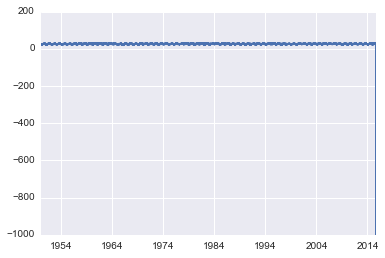

In [25]:
pp.plot(lihue_tmax['date'], lihue_tmax['value'])

In [36]:
# since data have -1000.0 as nan, we need to change it nan
def getobs(filename, obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -1000.0] = np.nan
    
    return data

In [37]:
lihue_tmax = getobs('USW00022536.dly', 'TMAX')
lihue_tmin = getobs('USW00022536.dly', 'TMIN')

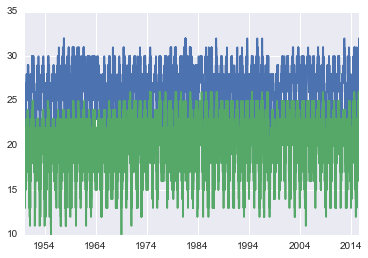

In [38]:
pp.plot(lihue_tmax['date'], lihue_tmax['value'])
pp.plot(lihue_tmin['date'], lihue_tmin['value'])


In [39]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(nan, nan)

[0, 8, 0, 12]

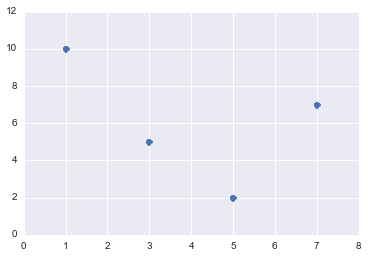

In [41]:
# to calculate the mean, we will fill in the missing values using the neighbors' value
# using numpy functoin interp
x = np.array([1, 3, 5, 7], 'd')
y = np.array([10, 5, 2, 7], 'd')

pp.plot(x, y, 'o')
pp.axis([0,8,0,12])

In [42]:
xs = np.linspace(1,7)

In [43]:
# interp function will draw straight line between the points we have, take values from the line
# interplate the xs, with x and y
ys = np.interp(xs, x, y)

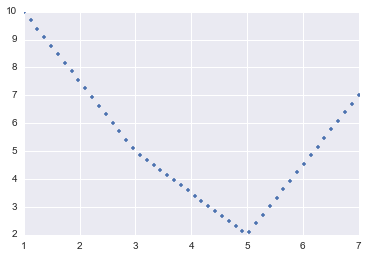

In [44]:
pp.plot(xs, ys, '.')

In [45]:
def fillnans(data):
    nan = np.isnan(data['value'])
    data['value'][nan] = np.interp(data['date'][nan], data['date'][-nan], data['value'][-nan])

In [47]:
fillnans(lihue_tmax)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  app.launch_new_instance()


TypeError: Cannot cast array data from dtype('<M8[D]') to dtype('float64') according to the rule 'safe'

In [58]:
# we need to convert the date type to floating numbers, then can apply interp function
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    data['value'][nan] = np.interp(dates_float[nan], dates_float[-nan], data['value'][-nan])

In [60]:
fillnans(lihue_tmax)
fillnans(lihue_tmin)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


In [61]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(20.59152316223992, 26.837926864862609)

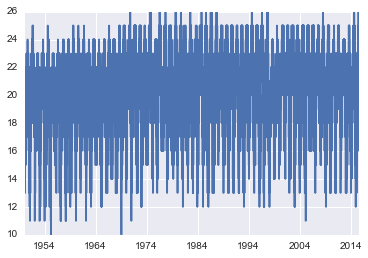

In [62]:
#smooth data
pp.plot(lihue_tmin['date'], lihue_tmin['value'])

In [63]:
# we smooth out short term oscillations
# generally by taking the average nearby values

# numpy function correlate multiple the sliding section of the one-dimension array with another array, 
#cumpute the sum of the multiplied values and stored it in a new array
def plot_smoothed(t, win = 10):
    smoothed = np.correlate(t['value'], np.ones(win)/win, 'same')
    # same make sure the result array has the same size as original array
    
    pp.plot(t['date'], smoothed)
    


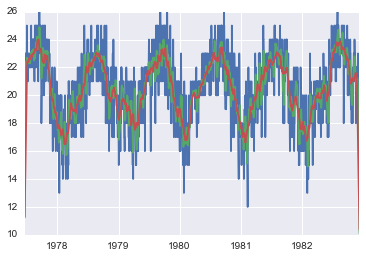

In [66]:
pp.plot(lihue_tmin[10000:12000]['date'], lihue_tmin[10000:12000]['value'])
plot_smoothed(lihue_tmin[10000:12000])
plot_smoothed(lihue_tmin[10000:12000], 30)


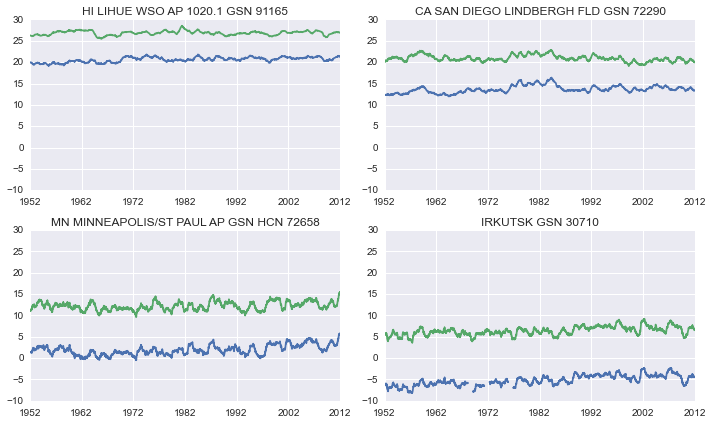

In [70]:
pp.figure(figsize = (10, 6))


for i, code in enumerate(datastations):
    pp.subplot(2, 2, i+1)
    
    plot_smoothed(getobs('{}.dly'.format(code), 'TMIN'), 365)
    plot_smoothed(getobs('{}.dly'.format(code), 'TMAX'), 365)
    
    pp.title(stations[code])
    pp.axis(xmin = np.datetime64('1952'), xmax =np.datetime64('2012'), ymin = -10, ymax = 30)
    
pp.tight_layout()

In [71]:
# also plot historial records
# combine boolean masks with logical operators
# computing max, min across single dimension with 2 dimension array
# plotting shaded areas

In [73]:
# function used to extract all the data for the specific year
def selectyear(data, year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1, 'Y')
    # return temperature only
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [74]:
selectyear(lihue_tmin, 1951)

array([ 17.,  17.,  17.,  18.,  20.,  21.,  22.,  21.,  22.,  22.,  21.,
        21.,  19.,  18.,  18.,  18.,  19.,  20.,  16.,  14.,  14.,  17.,
        15.,  12.,  14.,  13.,  15.,  14.,  17.,  18.,  16.,  16.,  17.,
        16.,  17.,  14.,  12.,  13.,  13.,  12.,  14.,  14.,  18.,  19.,
        20.,  18.,  18.,  18.,  20.,  18.,  19.,  13.,  11.,  17.,  17.,
        17.,  21.,  22.,  20.,  22.,  19.,  20.,  18.,  17.,  17.,  17.,
        16.,  18.,  18.,  18.,  17.,  16.,  15.,  13.,  13.,  15.,  15.,
        21.,  20.,  18.,  15.,  14.,  17.,  17.,  18.,  20.,  18.,  18.,
        18.,  20.,  20.,  18.,  18.,  21.,  16.,  21.,  21.,  21.,  17.,
        16.,  17.,  18.,  16.,  19.,  20.,  18.,  18.,  17.,  18.,  21.,
        21.,  21.,  21.,  20.,  20.,  20.,  21.,  20.,  20.,  19.,  18.,
        21.,  22.,  22.,  20.,  19.,  17.,  22.,  22.,  22.,  22.,  18.,
        17.,  18.,  19.,  22.,  22.,  22.,  20.,  21.,  21.,  22.,  19.,
        19.,  20.,  21.,  23.,  23.,  22.,  22.,  2

In [76]:
# arrange all the years in matrix, and ignore leap year
lihue_tmin_all = np.vstack([selectyear(lihue_tmin, year)[:365] for year in range(1951, 2014+1)])

In [77]:
lihue_tmin_all

array([[ 17.,  17.,  17., ...,  20.,  19.,  18.],
       [ 17.,  19.,  21., ...,  21.,  20.,  17.],
       [ 17.,  18.,  19., ...,  13.,  15.,  15.],
       ..., 
       [ 17.,  17.,  17., ...,  18.,  18.,  19.],
       [ 20.,  20.,  19., ...,  19.,  20.,  18.],
       [ 17.,  20.,  17., ...,  18.,  16.,  14.]])

In [78]:
lihue_tmin_all.shape

(64, 365)

In [79]:
# use numpy to calculate the maximun and mininum along each row
lihue_tmin_recordmin = np.min(lihue_tmin_all, axis = 0)
lihue_tmin_recordmax = np.max(lihue_tmin_all, axis = 0)

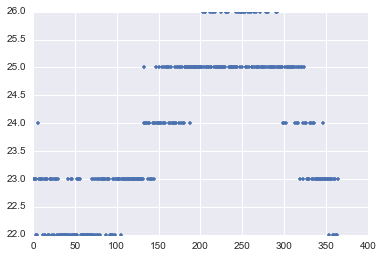

In [80]:
pp.plot(lihue_tmin_recordmax, ".")

In [81]:
lihue_tmax_all = np.vstack([selectyear(lihue_tmax, year)[:365] for year in range(1951, 2014+1)])

(0.0, 365, 10.0, 35.0)

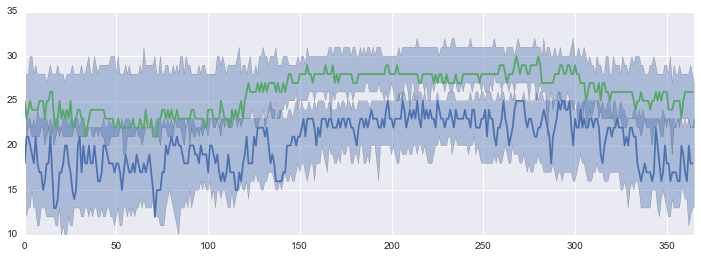

In [85]:
pp.figure(figsize= (12, 4))
days = np.arange(1, 365+1)
pp.fill_between(days, np.min(lihue_tmin_all, axis=0), np.max(lihue_tmin_all, axis = 0), alpha = 0.4)
pp.plot(selectyear(lihue_tmin, 2009))

pp.fill_between(days, np.min(lihue_tmax_all, axis=0), np.max(lihue_tmax_all, axis = 0), alpha = 0.4)
pp.plot(selectyear(lihue_tmax, 2009))


pp.axis(xmax=365)

In [88]:
# Find the year with the highest mean TMAX for Minneapolis

# In the same plot, show the TMIN and TMAX throughout those for thoes cities
#"Minneapolis" 'USW00014922'


In [122]:
minneapolis_tmax = getobs('USW00014922.dly', 'TMAX')
fillnans(minneapolis_tmax)

minneapolis_tmin = getobs('USW00014922.dly', 'TMIN')
fillnans(minneapolis_tmin)


/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


In [123]:
years = np.arange(1940, 2014+1)
# get the record of tmax for each year and stack into a matrix
minneapolis_tmax_all = np.vstack([selectyear(minneapolis_tmax, year)[:365] for year in years])
minneapolis_tmin_all = np.vstack([selectyear(minneapolis_tmin, year)[:365] for year in years])


In [106]:
minneapolis_tmax_all

array([[  2., -12.,  -8., ...,  -1.,  -1.,   0.],
       [-18., -12.,  -3., ...,  -4.,  -5.,  -3.],
       [ -4.,  -5.,  -4., ...,   2.,  -8.,   5.],
       ..., 
       [  1.,  -7.,  -2., ...,  -4.,  -8.,  -4.],
       [ -7.,  -7.,  -6., ...,  -7., -17., -19.],
       [-18., -16.,  -2., ..., -13., -16., -11.]])

In [124]:
minneapolis_tmin_all

array([[-20., -20., -21., ...,  -2.,  -1.,  -1.],
       [ -2.,  -9., -19., ..., -15., -12., -14.],
       [-17., -24., -26., ...,  -9., -10., -10.],
       ..., 
       [ -8., -12., -13., ..., -11., -15., -18.],
       [-21., -10., -12., ..., -24., -24., -23.],
       [-23., -24., -24., ..., -20., -22., -22.]])

In [107]:
minneapolis_tmax_all.shape

(64, 365)

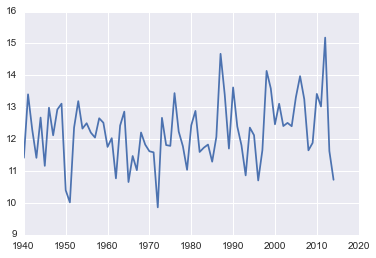

In [125]:
minneapolis_mean = np.mean(minneapolis_tmax_all, axis = 1)
pp.plot(years, minneapolis_mean)

In [126]:
# find which year has the highest mean temperature
minneapolis_warmest = years[np.argmax(minneapolis_mean)]
minneapolis_warmest

2012

In [ ]:
# Find the year with the lowest mean TMIN for San Diego

# In the same plot, show the TMIN and TMAX throughout those for thoes cities

#"San Diego" 'USW00023188'

In [127]:
sandiego_tmin = getobs('USW00023188.dly', 'TMIN')
fillnans(sandiego_tmin)

sandiego_tmax = getobs('USW00023188.dly', 'TMAX')
fillnans(sandiego_tmax)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


In [135]:
# get the record of tmin for each year and stack into a matrix

sandiego_tmax_all = np.vstack([selectyear(sandiego_tmax, year)[:365] for year in years])
sandiego_tmin_all = np.vstack([selectyear(sandiego_tmin, year)[:365] for year in years])


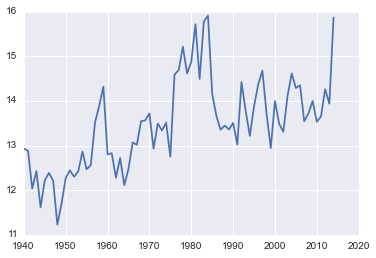

In [136]:
# find which year has the lowest mean temperature
sandiego_mean = np.mean(sandiego_tmin_all, axis = 1)
pp.plot(years, sandiego_mean)


In [137]:
sandiego_coldest = years[np.argmin(sandiego_mean)]
sandiego_coldest

1948

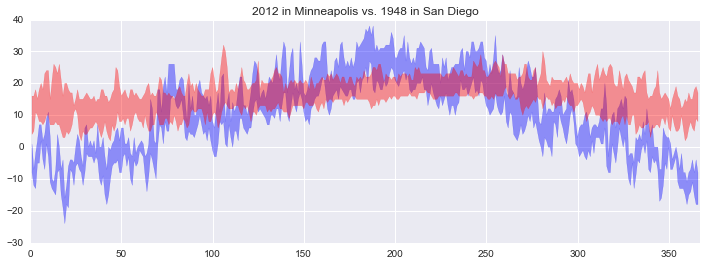

In [145]:
pp.figure(figsize= (12, 4))

days = np.arange(1, 366+1)
pp.fill_between(days, 
                selectyear(minneapolis_tmin, minneapolis_warmest), 
                selectyear(minneapolis_tmax, minneapolis_warmest),
               color = 'b', alpha = 0.4)


pp.fill_between(days, 
                selectyear(sandiego_tmin, sandiego_coldest), 
                selectyear(sandiego_tmax, sandiego_coldest),
               color = 'r', alpha = 0.4)

pp.axis(xmax=367)

pp.title('{} in Minneapolis vs. {} in San Diego'.format(minneapolis_warmest, sandiego_coldest))